In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# โหลดข้อมูล (แทน path ด้วย path ของคุณ)
df = pd.read_csv("/Users/blackrose/Desktop/cw_ji/dataset_3.csv")

df.head()


,Unnamed: 0,Approval_Date,Loan,Valuation,Country,Origin,Joint,App1_Age,App2_Age,App1_G,App2_G,App1_Income,App2_Income,Property_Type,Area,Property_Age,Advance_Date
0,0,2023-08-04,195000.0,254200.0,0.0,0.0,0,26.0,NaN,1,NaN,20772.0,NaN,3.0,1.0,10.0,NaN
1,1,2023-06-20,116000.0,190500.0,0.0,1.0,0,44.0,NaN,1,NaN,20000.0,NaN,2.0,0.0,97.0,2023-07-08
2,2,2021-10-23,74000.0,95100.0,1.0,1.0,0,47.0,NaN,1,NaN,20000.0,NaN,2.0,1.0,NaN,NaN
3,3,2022-07-20,124000.0,232800.0,0.0,1.0,1,30.0,61.0,1,0.0,21048.0,6902.0,2.0,1.0,55.0,2022-07-23
4,4,2024-08-08,120000.0,203400.0,0.0,2.0,1,65.0,52.0,1,0.0,5239.0,14761.0,1.0,NaN,18.0,NaN


In [3]:
df = df.drop(columns=['Unnamed: 0'])


In [4]:
df

,Approval_Date,Loan,Valuation,Country,Origin,Joint,App1_Age,App2_Age,App1_G,App2_G,App1_Income,App2_Income,Property_Type,Area,Property_Age,Advance_Date
0,2023-08-04,195000.0,254200.0,0.0,0.0,0,26.0,NaN,1,NaN,20772.0,NaN,3.0,1.0,10.0,NaN
1,2023-06-20,116000.0,190500.0,0.0,1.0,0,44.0,NaN,1,NaN,20000.0,NaN,2.0,0.0,97.0,2023-07-08
2,2021-10-23,74000.0,95100.0,1.0,1.0,0,47.0,NaN,1,NaN,20000.0,NaN,2.0,1.0,NaN,NaN
3,2022-07-20,124000.0,232800.0,0.0,1.0,1,30.0,61.0,1,0.0,21048.0,6902.0,2.0,1.0,55.0,2022-07-23
4,2024-08-08,120000.0,203400.0,0.0,2.0,1,65.0,52.0,1,0.0,5239.0,14761.0,1.0,NaN,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12530,2024-06-25,384000.0,721400.0,0.0,2.0,1,47.0,56.0,0,1.0,21915.0,29915.0,2.0,0.0,76.0,2024-07-21
12531,2023-08-13,165000.0,309600.0,0.0,1.0,0,53.0,NaN,0,NaN,33646.0,NaN,2.0,NaN,73.0,NaN
12532,2021-11-16,231000.0,260600.0,2.0,1.0,0,33.0,NaN,1,NaN,25055.0,NaN,2.0,0.0,14.0,NaN
12533,2023-02-15,367000.0,542300.0,0.0,1.0,0,55.0,NaN,0,NaN,42262.0,NaN,3.0,1.0,223.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12535 entries, 0 to 12534
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Approval_Date  12535 non-null  object 
 1   Loan           12535 non-null  float64
 2   Valuation      12535 non-null  float64
 3   Country        11913 non-null  float64
 4   Origin         11911 non-null  float64
 5   Joint          12535 non-null  int64  
 6   App1_Age       12535 non-null  float64
 7   App2_Age       5030 non-null   float64
 8   App1_G         12535 non-null  int64  
 9   App2_G         5030 non-null   float64
 10  App1_Income    12535 non-null  float64
 11  App2_Income    5030 non-null   float64
 12  Property_Type  11889 non-null  float64
 13  Area           11887 non-null  float64
 14  Property_Age   11935 non-null  float64
 15  Advance_Date   3548 non-null   object 
dtypes: float64(12), int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
df = pd.read_csv("/Users/blackrose/Desktop/cw_ji/dataset_3.csv", parse_dates=['Approval_Date', 'Advance_Date'])

# ลบคอลัมน์ Unnamed: 0 ที่ไม่จำเป็น
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12535 entries, 0 to 12534
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Approval_Date  12535 non-null  datetime64[ns]
 1   Loan           12535 non-null  float64       
 2   Valuation      12535 non-null  float64       
 3   Country        11913 non-null  float64       
 4   Origin         11911 non-null  float64       
 5   Joint          12535 non-null  int64         
 6   App1_Age       12535 non-null  float64       
 7   App2_Age       5030 non-null   float64       
 8   App1_G         12535 non-null  int64         
 9   App2_G         5030 non-null   float64       
 10  App1_Income    12535 non-null  float64       
 11  App2_Income    5030 non-null   float64       
 12  Property_Type  11889 non-null  float64       
 13  Area           11887 non-null  float64       
 14  Property_Age   11935 non-null  float64       
 15  Advance_Date   3548

In [8]:
df

,Approval_Date,Loan,Valuation,Country,Origin,Joint,App1_Age,App2_Age,App1_G,App2_G,App1_Income,App2_Income,Property_Type,Area,Property_Age,Advance_Date
0,2023-08-04,195000.0,254200.0,0.0,0.0,0,26.0,NaN,1,NaN,20772.0,NaN,3.0,1.0,10.0,NaT
1,2023-06-20,116000.0,190500.0,0.0,1.0,0,44.0,NaN,1,NaN,20000.0,NaN,2.0,0.0,97.0,2023-07-08
2,2021-10-23,74000.0,95100.0,1.0,1.0,0,47.0,NaN,1,NaN,20000.0,NaN,2.0,1.0,NaN,NaT
3,2022-07-20,124000.0,232800.0,0.0,1.0,1,30.0,61.0,1,0.0,21048.0,6902.0,2.0,1.0,55.0,2022-07-23
4,2024-08-08,120000.0,203400.0,0.0,2.0,1,65.0,52.0,1,0.0,5239.0,14761.0,1.0,NaN,18.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12530,2024-06-25,384000.0,721400.0,0.0,2.0,1,47.0,56.0,0,1.0,21915.0,29915.0,2.0,0.0,76.0,2024-07-21
12531,2023-08-13,165000.0,309600.0,0.0,1.0,0,53.0,NaN,0,NaN,33646.0,NaN,2.0,NaN,73.0,NaT
12532,2021-11-16,231000.0,260600.0,2.0,1.0,0,33.0,NaN,1,NaN,25055.0,NaN,2.0,0.0,14.0,NaT
12533,2023-02-15,367000.0,542300.0,0.0,1.0,0,55.0,NaN,0,NaN,42262.0,NaN,3.0,1.0,223.0,NaT


In [9]:
df['wait_days'] = (df['Advance_Date'] - df['Approval_Date']).dt.days
df

,Approval_Date,Loan,Valuation,Country,Origin,Joint,App1_Age,App2_Age,App1_G,App2_G,App1_Income,App2_Income,Property_Type,Area,Property_Age,Advance_Date,wait_days
0,2023-08-04,195000.0,254200.0,0.0,0.0,0,26.0,NaN,1,NaN,20772.0,NaN,3.0,1.0,10.0,NaT,NaN
1,2023-06-20,116000.0,190500.0,0.0,1.0,0,44.0,NaN,1,NaN,20000.0,NaN,2.0,0.0,97.0,2023-07-08,18.0
2,2021-10-23,74000.0,95100.0,1.0,1.0,0,47.0,NaN,1,NaN,20000.0,NaN,2.0,1.0,NaN,NaT,NaN
3,2022-07-20,124000.0,232800.0,0.0,1.0,1,30.0,61.0,1,0.0,21048.0,6902.0,2.0,1.0,55.0,2022-07-23,3.0
4,2024-08-08,120000.0,203400.0,0.0,2.0,1,65.0,52.0,1,0.0,5239.0,14761.0,1.0,NaN,18.0,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12530,2024-06-25,384000.0,721400.0,0.0,2.0,1,47.0,56.0,0,1.0,21915.0,29915.0,2.0,0.0,76.0,2024-07-21,26.0
12531,2023-08-13,165000.0,309600.0,0.0,1.0,0,53.0,NaN,0,NaN,33646.0,NaN,2.0,NaN,73.0,NaT,NaN
12532,2021-11-16,231000.0,260600.0,2.0,1.0,0,33.0,NaN,1,NaN,25055.0,NaN,2.0,0.0,14.0,NaT,NaN
12533,2023-02-15,367000.0,542300.0,0.0,1.0,0,55.0,NaN,0,NaN,42262.0,NaN,3.0,1.0,223.0,NaT,NaN


In [10]:
# ลบแถวที่ยังไม่ Advance (ไม่มี Advance date)
df = df.dropna(subset=['wait_days'])

In [11]:
df

,Approval_Date,Loan,Valuation,Country,Origin,Joint,App1_Age,App2_Age,App1_G,App2_G,App1_Income,App2_Income,Property_Type,Area,Property_Age,Advance_Date,wait_days
1,2023-06-20,116000.0,190500.0,0.0,1.0,0,44.0,NaN,1,NaN,20000.0,NaN,2.0,0.0,97.0,2023-07-08,18.0
3,2022-07-20,124000.0,232800.0,0.0,1.0,1,30.0,61.0,1,0.0,21048.0,6902.0,2.0,1.0,55.0,2022-07-23,3.0
7,2023-08-26,114000.0,264200.0,0.0,1.0,1,26.0,36.0,1,0.0,9141.0,10859.0,3.0,1.0,62.0,2023-09-24,29.0
10,2022-08-23,204000.0,370900.0,0.0,1.0,0,23.0,NaN,1,NaN,38340.0,NaN,2.0,NaN,232.0,2022-09-22,30.0
14,2024-02-08,95000.0,266800.0,3.0,1.0,1,33.0,32.0,0,1.0,14552.0,21557.0,3.0,1.0,16.0,2024-02-22,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12517,2023-05-21,55000.0,156200.0,0.0,1.0,1,66.0,31.0,1,0.0,4839.0,15161.0,2.0,0.0,22.0,2023-05-29,8.0
12525,2022-05-05,82000.0,96100.0,0.0,2.0,0,51.0,NaN,0,NaN,20000.0,NaN,2.0,2.0,12.0,2022-06-07,33.0
12529,2022-08-26,245000.0,286500.0,0.0,0.0,0,39.0,NaN,0,NaN,27349.0,NaN,3.0,0.0,161.0,2022-10-07,42.0
12530,2024-06-25,384000.0,721400.0,0.0,2.0,1,47.0,56.0,0,1.0,21915.0,29915.0,2.0,0.0,76.0,2024-07-21,26.0


In [13]:
df.isnull().sum()

Approval_Date       0
Loan                0
Valuation           0
Country           193
Origin            181
Joint               0
App1_Age            0
App2_Age         2125
App1_G              0
App2_G           2125
App1_Income         0
App2_Income      2125
Property_Type     195
Area              176
Property_Age      161
Advance_Date        0
wait_days           0
dtype: int64

In [14]:
df['App2_Age'] = df['App2_Age'].fillna(0)
df['App2_Income'] = df['App2_Income'].fillna(0)
df['App2_G'] = df['App2_G'].fillna("Unknown")
df['Area'] = df['Area'].fillna(df['Area'].mode()[0])
df['Property_Age'] = df['Property_Age'].fillna(df['Property_Age'].mean())


/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_73602/2142668169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['App2_Age'] = df['App2_Age'].fillna(0)
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_73602/2142668169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['App2_Income'] = df['App2_Income'].fillna(0)
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_73602/2142668169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [15]:
df.isnull().sum()

Approval_Date      0
Loan               0
Valuation          0
Country          193
Origin           181
Joint              0
App1_Age           0
App2_Age           0
App1_G             0
App2_G             0
App1_Income        0
App2_Income        0
Property_Type    195
Area               0
Property_Age       0
Advance_Date       0
wait_days          0
dtype: int64

In [16]:
# เติมค่าว่างด้วยค่าที่พบบ่อยที่สุด (mode)
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Origin'] = df['Origin'].fillna(df['Origin'].mode()[0])
df['Property_Type'] = df['Property_Type'].fillna(df['Property_Type'].mode()[0])


/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_73602/3488879307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_73602/3488879307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Origin'] = df['Origin'].fillna(df['Origin'].mode()[0])
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_73602/3488879307.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [17]:
df

,Approval_Date,Loan,Valuation,Country,Origin,Joint,App1_Age,App2_Age,App1_G,App2_G,App1_Income,App2_Income,Property_Type,Area,Property_Age,Advance_Date,wait_days
1,2023-06-20,116000.0,190500.0,0.0,1.0,0,44.0,0.0,1,Unknown,20000.0,0.0,2.0,0.0,97.0,2023-07-08,18.0
3,2022-07-20,124000.0,232800.0,0.0,1.0,1,30.0,61.0,1,0.0,21048.0,6902.0,2.0,1.0,55.0,2022-07-23,3.0
7,2023-08-26,114000.0,264200.0,0.0,1.0,1,26.0,36.0,1,0.0,9141.0,10859.0,3.0,1.0,62.0,2023-09-24,29.0
10,2022-08-23,204000.0,370900.0,0.0,1.0,0,23.0,0.0,1,Unknown,38340.0,0.0,2.0,0.0,232.0,2022-09-22,30.0
14,2024-02-08,95000.0,266800.0,3.0,1.0,1,33.0,32.0,0,1.0,14552.0,21557.0,3.0,1.0,16.0,2024-02-22,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12517,2023-05-21,55000.0,156200.0,0.0,1.0,1,66.0,31.0,1,0.0,4839.0,15161.0,2.0,0.0,22.0,2023-05-29,8.0
12525,2022-05-05,82000.0,96100.0,0.0,2.0,0,51.0,0.0,0,Unknown,20000.0,0.0,2.0,2.0,12.0,2022-06-07,33.0
12529,2022-08-26,245000.0,286500.0,0.0,0.0,0,39.0,0.0,0,Unknown,27349.0,0.0,3.0,0.0,161.0,2022-10-07,42.0
12530,2024-06-25,384000.0,721400.0,0.0,2.0,1,47.0,56.0,0,1.0,21915.0,29915.0,2.0,0.0,76.0,2024-07-21,26.0


คำถามดีมาก! โค้ดบรรทัดนี้คือการ **สร้างฟีเจอร์ใหม่ (feature engineering)** เพื่อให้โมเดลของเราฉลาดขึ้น เข้าใจข้อมูลมากขึ้น ซึ่งช่วยเพิ่มความแม่นยำในการพยากรณ์ `wait_days` ได้

---

### 🔍 อธิบายแต่ละฟีเจอร์:

#### 🔸 `LTV` (Loan to Value Ratio)
```python
df['LTV'] = df['Loan'] / df['Valuation']
```
- เป็นอัตราส่วนระหว่างวงเงินกู้กับมูลค่าทรัพย์สิน
- ธนาคารมักใช้ในการประเมินความเสี่ยง (ยิ่ง LTV สูง ยิ่งเสี่ยง)
- คนที่มี LTV สูงอาจใช้เวลานานกว่าจะโอนบ้านสำเร็จ

---

#### 🔸 `Total_Income`
```python
df['Total_Income'] = df['App1_Income'] + df['App2_Income']
```
- รายได้รวมของผู้กู้ทั้งหมด
- รายได้มากอาจหมายถึงกระบวนการอนุมัติง่ายขึ้น การซื้อบ้านอาจเร็วขึ้น

---

#### 🔸 `Avg_Age`
```python
df['Avg_Age'] = (df['App1_Age'] + df['App2_Age']) / 2
```
- อายุเฉลี่ยของผู้กู้
- บ่งบอกถึง life stage เช่น คนอายุน้อยอาจซื้อบ้านหลังแรก / คนอายุเยอะอาจซื้อบ้านหลังเกษียณ — มีผลกับระยะเวลาการดำเนินการ

---

### ✅ สรุป: ทำไปเพื่ออะไร?

**เพื่อเพิ่มความสามารถในการอธิบาย (explanatory power) ของโมเดล** โดยใช้ logic ทางธุรกิจที่สมเหตุสมผล — โมเดลจะเข้าใจพฤติกรรมลูกค้าได้ดีขึ้น และพยากรณ์ `wait_days` ได้แม่นยำขึ้นนั่นเอง 📈

---

ถ้าคุณอยากเพิ่มฟีเจอร์อื่น ๆ เช่น:

- ฤดูกาล (`season`)
- เดือนอนุมัติ (`approval_month`)
- วันในสัปดาห์ (`approval_weekday`)

ก็สามารถทำเพิ่มได้ง่าย ๆ นะ เดี๋ยวช่วยเขียนให้เลยก็ได้ 😄

In [18]:
# ====== 2. สร้างฟีเจอร์ใหม่ ======
df['LTV'] = df['Loan'] / df['Valuation']
df['Total_Income'] = df['App1_Income'] + df['App2_Income']

import numpy as np

df['Avg_Age'] = np.where(
    df['Joint'] == 0,
    df['App1_Age'],
    (df['App1_Age'] + df['App2_Age']) / 2
)

df



/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_73602/1171836424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LTV'] = df['Loan'] / df['Valuation']
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_73602/1171836424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Income'] = df['App1_Income'] + df['App2_Income']
/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_73602/1171836424.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,Approval_Date,Loan,Valuation,Country,Origin,Joint,App1_Age,App2_Age,App1_G,App2_G,App1_Income,App2_Income,Property_Type,Area,Property_Age,Advance_Date,wait_days,LTV,Total_Income,Avg_Age
1,2023-06-20,116000.0,190500.0,0.0,1.0,0,44.0,0.0,1,Unknown,20000.0,0.0,2.0,0.0,97.0,2023-07-08,18.0,0.608924,20000.0,44.0
3,2022-07-20,124000.0,232800.0,0.0,1.0,1,30.0,61.0,1,0.0,21048.0,6902.0,2.0,1.0,55.0,2022-07-23,3.0,0.532646,27950.0,45.5
7,2023-08-26,114000.0,264200.0,0.0,1.0,1,26.0,36.0,1,0.0,9141.0,10859.0,3.0,1.0,62.0,2023-09-24,29.0,0.431491,20000.0,31.0
10,2022-08-23,204000.0,370900.0,0.0,1.0,0,23.0,0.0,1,Unknown,38340.0,0.0,2.0,0.0,232.0,2022-09-22,30.0,0.550013,38340.0,23.0
14,2024-02-08,95000.0,266800.0,3.0,1.0,1,33.0,32.0,0,1.0,14552.0,21557.0,3.0,1.0,16.0,2024-02-22,14.0,0.356072,36109.0,32.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12517,2023-05-21,55000.0,156200.0,0.0,1.0,1,66.0,31.0,1,0.0,4839.0,15161.0,2.0,0.0,22.0,2023-05-29,8.0,0.352113,20000.0,48.5
12525,2022-05-05,82000.0,96100.0,0.0,2.0,0,51.0,0.0,0,Unknown,20000.0,0.0,2.0,2.0,12.0,2022-06-07,33.0,0.853278,20000.0,51.0
12529,2022-08-26,245000.0,286500.0,0.0,0.0,0,39.0,0.0,0,Unknown,27349.0,0.0,3.0,0.0,161.0,2022-10-07,42.0,0.855148,27349.0,39.0
12530,2024-06-25,384000.0,721400.0,0.0,2.0,1,47.0,56.0,0,1.0,21915.0,29915.0,2.0,0.0,76.0,2024-07-21,26.0,0.532298,51830.0,51.5


In [19]:
features = [
    'Loan', 'Valuation', 'Country', 'Origin', 'Joint',
    'App1_Age', 'App2_Age', 'App1_Income', 'App2_Income',
    'Property_Type', 'Area', 'Property_Age',
    'LTV', 'Total_Income', 'Avg_Age'
]

In [20]:
X = df[features]
y = df['wait_days']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# กำหนดพารามิเตอร์ที่เราต้องการทำ Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],  # จำนวนต้นไม้
    'max_depth': [None, 10, 20, 30],  # ความลึกสูงสุดของต้นไม้
    'min_samples_split': [2, 5, 10],  # จำนวนตัวอย่างขั้นต่ำในการแบ่ง node
    'min_samples_leaf': [1, 2, 4],    # จำนวนตัวอย่างขั้นต่ำที่ leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # จำนวนฟีเจอร์ที่ใช้ในการแบ่ง node
}

# สร้างโมเดล RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# สร้าง GridSearchCV และหาค่าที่ดีที่สุด
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# ฝึกโมเดลกับ GridSearchCV
grid_search.fit(X_train, y_train)

# แสดงผลลัพธ์ค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", grid_search.best_params_)

# ใช้โมเดลที่ดีที่สุดจาก GridSearchCV
best_rf_model = grid_search.best_estimator_

# ทำนายค่า y_test ด้วยโมเดลที่ดีที่สุด
y_pred = best_rf_model.predict(X_test)

# ประเมินผลลัพธ์
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f} วัน")
print(f"RMSE: {rmse:.2f} วัน")


/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
413 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/blackrose/miniconda3/envs/new_env/lib/python3.9/site-packages/sklearn/base.py", line 436,

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
MAE: 8.75 วัน
RMSE: 10.80 วัน


In [27]:
from sklearn.metrics import r2_score

# คำนวณ R²
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


R-squared (R²): 0.4391136404482934


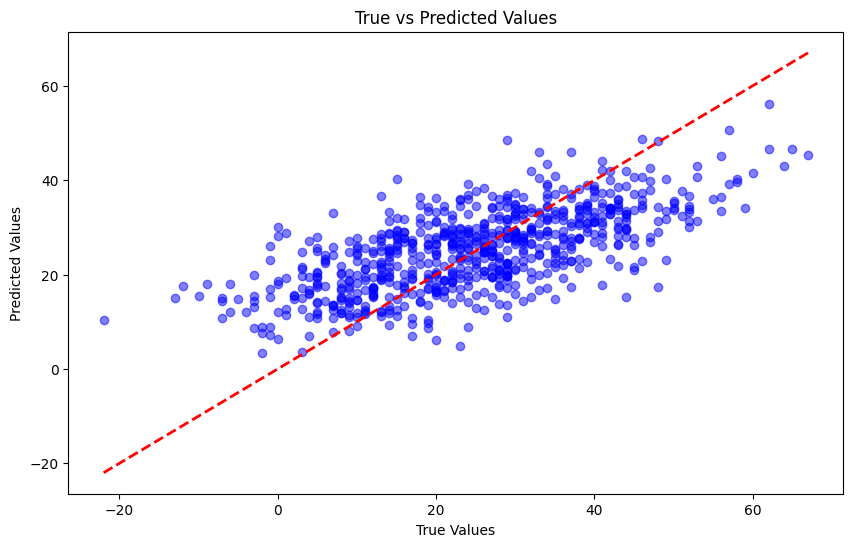

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ทำนายค่า y_test ด้วยโมเดลที่ดีที่สุดจาก GridSearchCV
y_pred = best_rf_model.predict(X_test)

# เปรียบเทียบค่าจริงกับค่าที่ทำนาย
plt.figure(figsize=(10, 6))

# Scatter plot: ค่าจริง vs ค่าที่ทำนาย
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')  # เส้น diagonal

# กำหนดชื่อกราฟและป้ายแกน
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# แสดงกราฟ
plt.show()


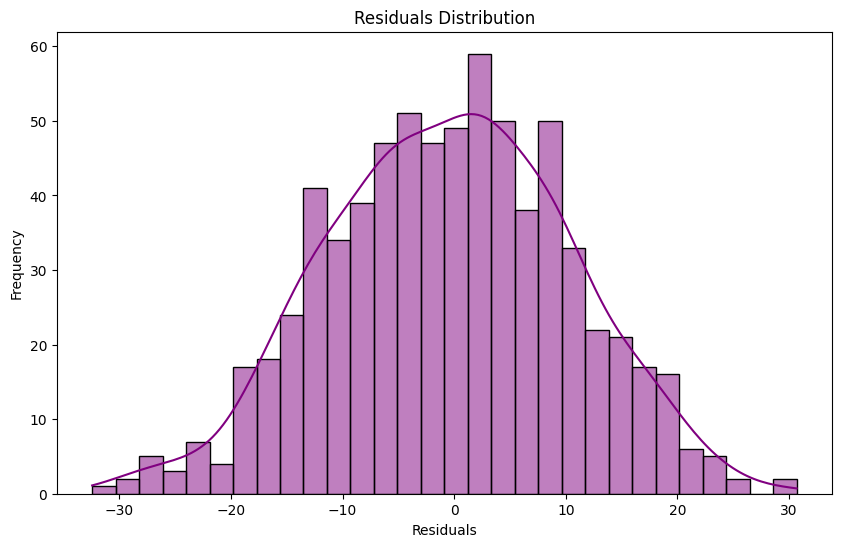

In [26]:
# คำนวณ residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# แสดงกราฟ
plt.show()


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# กำหนดค่า parameter grid ที่เราต้องการ tune สำหรับ Gradient Boosting
param_grid_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# สร้างโมเดล Gradient Boosting
gbm = GradientBoostingRegressor(random_state=42)

# ใช้ GridSearchCV ในการหาค่าที่ดีที่สุด
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, n_jobs=-1, verbose=2)

# ฝึกโมเดลด้วยข้อมูล training
grid_search_gbm.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุดจากการ tune
best_params_gbm = grid_search_gbm.best_params_
best_model_gbm = grid_search_gbm.best_estimator_

# ทำนายผลลัพธ์จากโมเดลที่ดีที่สุด
y_pred_gbm = best_model_gbm.predict(X_test)

# คำนวณค่า MAE, MSE, RMSE, R²
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

# แสดงผลลัพธ์
print(f"Best Parameters for Gradient Boosting: {best_params_gbm}")
print(f"Gradient Boosting - MAE: {mae_gbm}")
print(f"Gradient Boosting - MSE: {mse_gbm}")
print(f"Gradient Boosting - RMSE: {rmse_gbm}")
print(f"Gradient Boosting - R²: {r2_gbm}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.4s
[CV] END ...learning_rate=0.01, max_depth=5, n_

In [33]:
import xgboost as xgb

# กำหนดค่า parameter grid ที่เราต้องการ tune สำหรับ XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# สร้างโมเดล XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)

# ใช้ GridSearchCV ในการหาค่าที่ดีที่สุด
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# ฝึกโมเดลด้วยข้อมูล training
grid_search_xgb.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุดจากการ tune
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_

# ทำนายผลลัพธ์จากโมเดลที่ดีที่สุด
y_pred_xgb = best_model_xgb.predict(X_test)

# คำนวณค่า MAE, MSE, RMSE, R²
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# แสดงผลลัพธ์
print(f"Best Parameters for XGBoost: {best_params_xgb}")
print(f"XGBoost - MAE: {mae_xgb}")
print(f"XGBoost - MSE: {mse_xgb}")
print(f"XGBoost - RMSE: {rmse_xgb}")
print(f"XGBoost - R²: {r2_xgb}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [32]:
! pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.6 MB/s eta 0:00:00
